In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification

x, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)

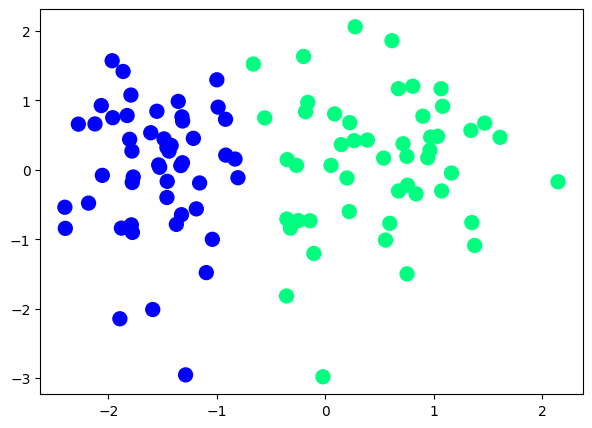

In [3]:
%matplotlib inline
plt.figure(figsize=(7,5))
plt.scatter(x[:,0], x[:,1], cmap='winter', c=y, s = 100)

In [4]:
x_ = np.insert(x, 0, 1, axis=1)
x_

array([[ 1.        ,  0.19924745, -0.11697552],
       [ 1.        , -0.24882029, -0.73115232],
       [ 1.        , -0.3544904 , -0.7081059 ],
       [ 1.        , -1.59086506, -2.01199214],
       [ 1.        , -0.20083951,  1.63493163],
       [ 1.        , -0.83241122,  0.15599044],
       [ 1.        , -1.79207014,  1.07782053],
       [ 1.        ,  0.0856607 ,  0.80626713],
       [ 1.        , -0.55865299,  0.74859527],
       [ 1.        , -1.95974262,  0.75152794],
       [ 1.        , -1.77828947, -0.90114581],
       [ 1.        , -1.77985853, -0.1815243 ],
       [ 1.        , -0.02194151, -2.98092432],
       [ 1.        ,  0.80563431,  1.20500136],
       [ 1.        , -1.82701214,  0.78302407],
       [ 1.        ,  0.38730728,  0.42968688],
       [ 1.        , -0.14108668, -0.73229726],
       [ 1.        , -1.87955941, -0.83930476],
       [ 1.        , -0.18232911,  0.83727062],
       [ 1.        , -1.77059533, -0.10255323],
       [ 1.        , -2.27658028,  0.658

In [5]:
x_[1]

array([ 1.        , -0.24882029, -0.73115232])

In [6]:
s = np.ones(x.shape[1])
s

array([1., 1.])

In [7]:
_ = np.dot(x_[41], [1,1,1])          # Dot product
_

0.2946000908036749

In [8]:
def step(m):
    return 1 if m>0 else 0

In [9]:
pri = step(0.12)
print(pri)

1


In [16]:
x[1]

array([-0.24882029, -0.73115232])

In [10]:
# Algorithm

def perceptron(X, Y):
    lr = 0.1
    X = np.insert(X, 0, 1, axis = 1)
    weights = np.ones(X.shape[1])
    epochs = 1000
    
    for i in range(epochs):
        j = np.random.randint(0 , 100)
        y_hat = step(np.dot(X[j], weights))             # step is used because y_hat is either 0 or 1 
        weights = weights + lr*(Y[j] - y_hat)*X[j]
    
    return weights[0], weights[1:]              # Intercept , coeff

In [11]:
intercept, coeff = perceptron(x,y)
print(intercept)
print(coeff)

0.9
[1.38852879 0.05506476]


- Ax + By + C = 0

m = A/B

b = -C/B

In [12]:
m = -coeff[0]/coeff[1]
b = -intercept/coeff[1]

In [13]:
x_inp = np.linspace(-3,3,100)
y_inp = m*x_inp + b

(-3.0, 2.0)

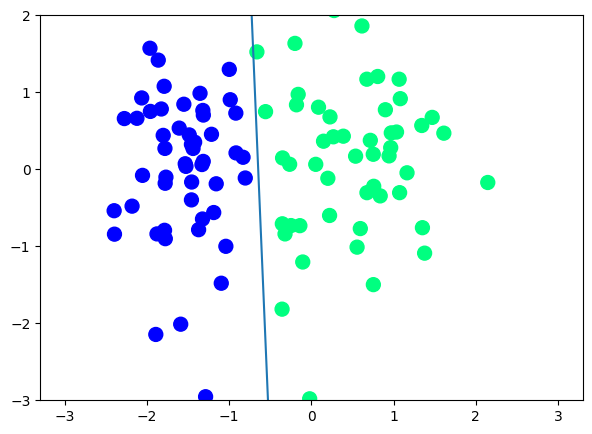

In [14]:
%matplotlib inline
plt.figure(figsize=(7,5))
plt.plot(x_inp, y_inp)
plt.scatter(x[:,0], x[:,1], c=y, cmap='winter', s=100)
plt.ylim(-3,2)